<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

© Copyright Quantopian Inc.<br>
© Modifications Copyright QuantRocket LLC<br>
Licensed under the [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/legalcode).

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Introduction to pandas
by Maxwell Margenot


pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

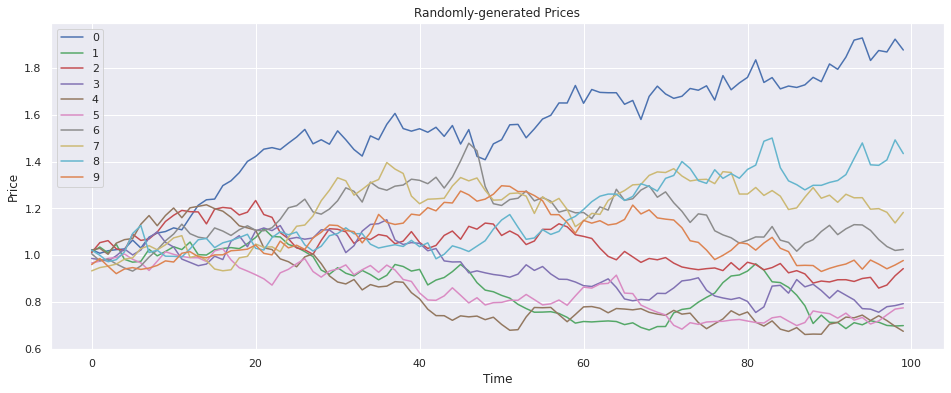

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [4]:
print(s.name)

None


This name can be directly modified with no repercussions.

In [5]:
s.name = "Toy Series"
print(s.name)

Toy Series


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [6]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [7]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [8]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [9]:
print("First element of the series:", s.iloc[0])
print("Last element of the series:", s.iloc[len(s)-1])

First element of the series: 1.0
Last element of the series: 5.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [10]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [11]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [12]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [13]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [14]:
s.loc['2016-01-01']

1.0

Or even for a range of dates!

In [15]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [16]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [17]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [18]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_prices()` function. All data pulled with `get_prices()` will be in `DataFrame` format. We can modify this index however we like.

In [19]:
from quantrocket.master import get_securities
securities = get_securities(symbols='XOM', fields=['Sid','Symbol','Exchange'], vendors='usstock')
securities

,Symbol,Exchange
Sid,,
FIBBG000GZQ728,XOM,XNYS


In [20]:
from quantrocket import get_prices
XOM = securities.index[0]
start = "2012-01-01"
end = "2016-01-01"
prices = get_prices("usstock-free-1min", data_frequency="daily", sids=XOM, start_date=start, end_date=end, fields="Close")
prices = prices.loc["Close"][XOM]

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [21]:
print(type(prices))
prices.head(5) 

<class 'pandas.core.series.Series'>


Date
2012-01-03    81.805
2012-01-04    81.824
2012-01-05    81.577
2012-01-06    80.968
2012-01-09    81.329
Name: FIBBG000GZQ728, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [22]:
print('Old name:', prices.name)
prices.name = "XOM"
print('New name:', prices.name)

Old name: FIBBG000GZQ728
New name: XOM


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [23]:
print(prices.index)
print("tz:", prices.index.tz)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)
tz: None


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends). Let's downsample from this daily data to monthly data using the `resample()` method.

In [24]:
monthly_prices = prices.resample('M').last()
monthly_prices.head(10)

Date
2012-01-31    79.655
2012-02-29    82.281
2012-03-31    82.499
2012-04-30    82.128
2012-05-31    74.795
2012-06-30    81.396
2012-07-31    82.614
2012-08-31    83.042
2012-09-30    86.989
2012-10-31    86.723
Freq: M, Name: XOM, dtype: float64

In the above example we use the last value of the lower level data to create the higher level data. We can specify how else we might want the down-sampling to be calculated, for example using the median.

In [25]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

Date
2012-01-31    81.6100
2012-02-29    81.3440
2012-03-31    81.8860
2012-04-30    81.2105
2012-05-31    78.1380
2012-06-30    78.1050
2012-07-31    81.3010
2012-08-31    83.6310
2012-09-30    86.7800
2012-10-31    87.2460
Freq: M, Name: XOM, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [26]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

Date
2012-01-31    81.805
2012-02-29    79.874
2012-03-31    82.595
2012-04-30    82.823
2012-05-31    82.794
2012-06-30    74.119
2012-07-31    81.177
2012-08-31    82.671
2012-09-30    82.870
2012-10-31    87.322
Freq: M, Name: XOM, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series isn't localized to a timezone, but let's say that we want to localize the time to be 'America/New_York'. In this case we use the `tz_localize()` method, since the time isn't already localized.

In [27]:
eastern_prices = prices.tz_localize('America/New_York')
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    81.805
2012-01-04 00:00:00-05:00    81.824
2012-01-05 00:00:00-05:00    81.577
2012-01-06 00:00:00-05:00    80.968
2012-01-09 00:00:00-05:00    81.329
2012-01-10 00:00:00-05:00    81.539
2012-01-11 00:00:00-05:00    80.930
2012-01-12 00:00:00-05:00    80.606
2012-01-13 00:00:00-05:00    80.740
2012-01-17 00:00:00-05:00    81.510
Name: XOM, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we get from `get_prices()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [28]:
calendar_dates = pd.date_range(start=start, end=end, freq='D')
print(calendar_dates)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=1462, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [29]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01       NaN
2012-01-02       NaN
2012-01-03    81.805
2012-01-04    81.824
2012-01-05    81.577
2012-01-06    80.968
2012-01-07    80.968
2012-01-08    80.968
2012-01-09    81.329
2012-01-10    81.539
2012-01-11    80.930
2012-01-12    80.606
2012-01-13    80.740
2012-01-14    80.740
2012-01-15    80.740
Freq: D, Name: XOM, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [30]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01    86.803071
2012-01-02    86.803071
2012-01-03    81.805000
2012-01-04    81.824000
2012-01-05    81.577000
2012-01-06    80.968000
2012-01-07    80.968000
2012-01-08    80.968000
2012-01-09    81.329000
2012-01-10    81.539000
Freq: D, Name: XOM, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the lecture on stationarity in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [31]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01    81.805
2012-01-02    81.805
2012-01-03    81.805
2012-01-04    81.824
2012-01-05    81.577
2012-01-06    80.968
2012-01-07    80.968
2012-01-08    80.968
2012-01-09    81.329
2012-01-10    81.539
Freq: D, Name: XOM, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, is tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [32]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03    81.805
2012-01-04    81.824
2012-01-05    81.577
2012-01-06    80.968
2012-01-07    80.968
2012-01-08    80.968
2012-01-09    81.329
2012-01-10    81.539
2012-01-11    80.930
2012-01-12    80.606
Freq: D, Name: XOM, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

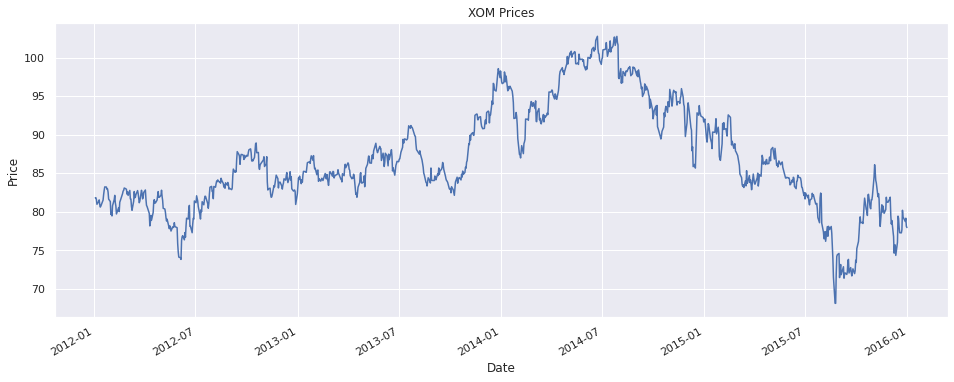

In [33]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title("XOM Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [34]:
print("Mean:", prices.mean())
print("Standard deviation:", prices.std())

Mean: 86.77727534791242
Standard deviation: 6.800728542530041


In [35]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    1006.000000
mean       86.777275
std         6.800729
min        68.116000
25%        82.356500
50%        85.377000
75%        91.559500
max       102.762000
Name: XOM, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [36]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    153.610
2012-01-04    153.648
2012-01-05    153.154
2012-01-06    151.936
2012-01-09    152.658
Name: XOM, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [37]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    172.807266
2012-01-04     82.548895
2012-01-05     76.929013
2012-01-06     88.068906
2012-01-09    138.366821
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [38]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03   NaN
2012-01-04   NaN
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [39]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

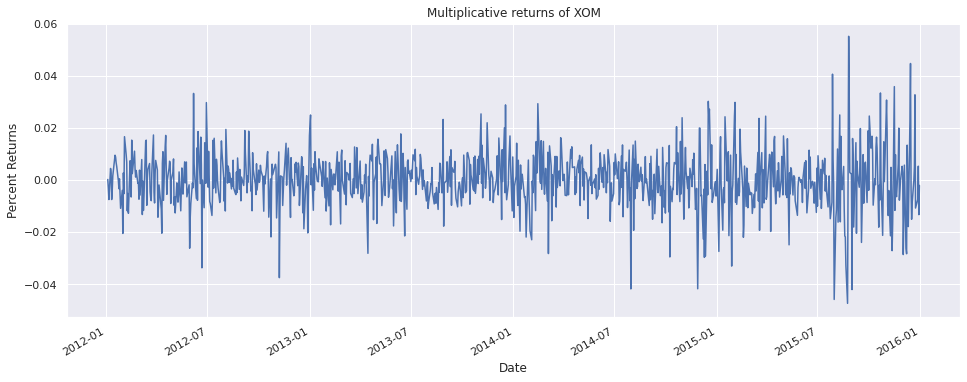

In [40]:
plt.title("Multiplicative returns of XOM")
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [41]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

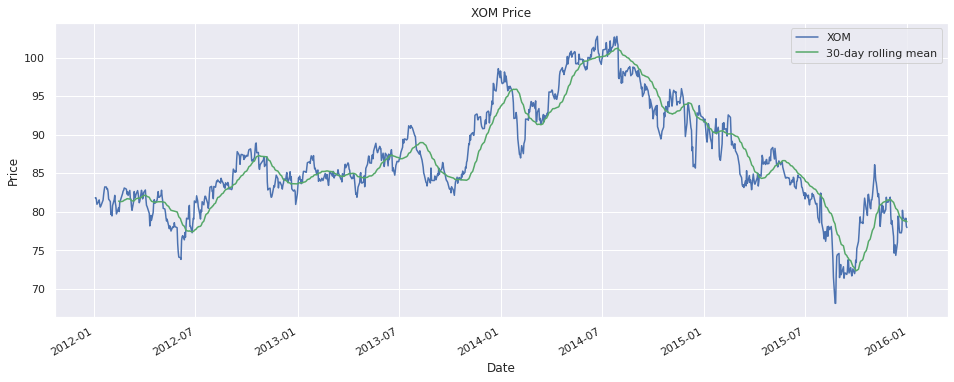

In [42]:
prices.plot()
rolling_mean.plot()
plt.title("XOM Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [43]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

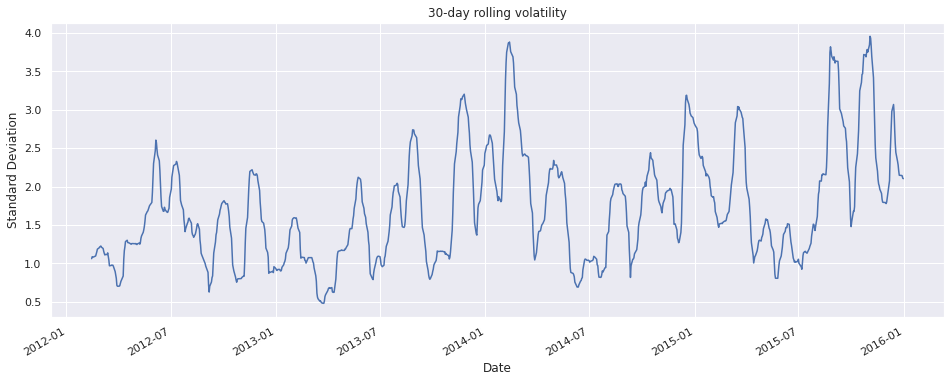

In [44]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [45]:
print(np.median(mult_returns))

-0.000332104546511


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [46]:
print(mult_returns.median())

-0.0003321045465112249


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](https://pandas.pydata.org/docs/user_guide/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [47]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.56478731, -0.54468815, -0.97128315,  0.73563591, -0.02876649])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [48]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -0.564787
2016-01-02  2  K -0.544688
2016-01-03  3  J -0.971283
2016-01-04  4  M  0.735636
2016-01-05  5  Z -0.028766


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [49]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [50]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [51]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [52]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [53]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [54]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

This returns a NumPy array.

In [55]:
type(numbers.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

Let's start by loading price data for several securities:

In [56]:
securities = get_securities(symbols=['XOM', 'JNJ', 'MON', 'KKD'], vendors='usstock')
securities

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000CK38G3,KKD,XNYS,US,USD,STK,False,America/New_York,KRISPY KREME DOUGHNUTS INC,1,1,True,2016-07-27,NaT,NaT
FIBBG000GZQ728,XOM,XNYS,US,USD,STK,False,America/New_York,EXXON MOBIL CORP,1,1,False,NaT,NaT,NaT


Since `get_securities` returns sids in the index, we can call the index's `tolist()` method to pass a list of sids to `get_prices`:

In [57]:
start = "2012-01-01"
end = "2017-01-01"

prices = get_prices("usstock-free-1min", data_frequency="daily", sids=securities.index.tolist(), start_date=start, end_date=end, fields="Close")
prices = prices.loc["Close"]
prices.head()

Sid,FIBBG000BMHYD1,FIBBG000CK38G3,FIBBG000BFWKC0,FIBBG000GZQ728
Date,,,,
2012-01-03,60.473,6.52,68.281,79.014
2012-01-04,60.105,6.36,68.974,79.033
2012-01-05,60.032,6.42,72.780,78.794
2012-01-06,59.509,7.12,73.567,78.206
2012-01-09,59.601,7.31,74.507,78.555


For the purpose of this tutorial, it will be more convenient to reference the data by symbol instead of sid. To do this, we can create a Python dictionary mapping sid to symbol, and use the dictionary to rename the columns, using the DataFrame's `rename` method: 

In [58]:
sids_to_symbols = securities.Symbol.to_dict()
prices = prices.rename(columns=sids_to_symbols)
prices.head()

Sid,JNJ,KKD,MON,XOM
Date,,,,
2012-01-03,60.473,6.52,68.281,79.014
2012-01-04,60.105,6.36,68.974,79.033
2012-01-05,60.032,6.42,72.780,78.794
2012-01-06,59.509,7.12,73.567,78.206
2012-01-09,59.601,7.31,74.507,78.555


Here we directly access the `XOM` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [59]:
prices.XOM.head()

Date
2012-01-03    79.014
2012-01-04    79.033
2012-01-05    78.794
2012-01-06    78.206
2012-01-09    78.555
Name: XOM, dtype: float64

We can also access the column using the column name in brackets:

In [60]:
prices["XOM"].head()

Date
2012-01-03    79.014
2012-01-04    79.033
2012-01-05    78.794
2012-01-06    78.206
2012-01-09    78.555
Name: XOM, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [61]:
prices.loc[:, 'XOM'].head()

Date
2012-01-03    79.014
2012-01-04    79.033
2012-01-05    78.794
2012-01-06    78.206
2012-01-09    78.555
Name: XOM, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [62]:
print(type(prices.XOM))
print(type(prices.loc[:, 'XOM']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'XOM'`. Lists of columns are also supported.

In [63]:
prices.loc[:, ['XOM', 'JNJ']].head()

Sid,XOM,JNJ
Date,,
2012-01-03,79.014,60.473
2012-01-04,79.033,60.105
2012-01-05,78.794,60.032
2012-01-06,78.206,59.509
2012-01-09,78.555,59.601


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [64]:
prices.loc['2015-12-15':'2015-12-22']

Sid,JNJ,KKD,MON,XOM
Date,,,,
2015-12-15,101.268,15.12,93.491,76.720
2015-12-16,102.357,15.09,94.928,76.450
2015-12-17,100.791,14.86,93.608,75.300
2015-12-18,99.148,14.81,92.728,74.644
2015-12-21,98.788,14.98,93.305,74.624
2015-12-22,99.887,14.96,95.143,75.001


This plays nicely with lists of columns, too.

In [65]:
prices.loc['2015-12-15':'2015-12-22', ['XOM', 'JNJ']]

Sid,XOM,JNJ
Date,,
2015-12-15,76.720,101.268
2015-12-16,76.450,102.357
2015-12-17,75.300,100.791
2015-12-18,74.644,99.148
2015-12-21,74.624,98.788
2015-12-22,75.001,99.887


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [66]:
prices.iloc[0:2, 1]

Date
2012-01-03    6.52
2012-01-04    6.36
Name: KKD, dtype: float64

In [67]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 2
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 2]].head(20)

Sid,JNJ,MON
Date,,
2012-01-04,60.105,68.974
2012-01-06,59.509,73.567
2012-01-10,59.848,75.172
2012-01-12,59.876,76.187
2012-01-17,59.775,76.538
2012-01-19,59.839,76.263
2012-01-23,59.665,75.826
2012-01-25,59.867,77.184
2012-01-27,60.179,76.434


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [68]:
prices.loc[prices.MON > prices.JNJ].head()

Sid,JNJ,KKD,MON,XOM
Date,,,,
2012-01-03,60.473,6.52,68.281,79.014
2012-01-04,60.105,6.36,68.974,79.033
2012-01-05,60.032,6.42,72.780,78.794
2012-01-06,59.509,7.12,73.567,78.206
2012-01-09,59.601,7.31,74.507,78.555


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [69]:
prices.loc[(prices.MON > prices.JNJ) & ~(prices.XOM > 66)].head()

Sid,JNJ,KKD,MON,XOM
Date,,,,
2015-08-24,89.608,16.71,90.906,65.802


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [70]:
securities = get_securities(symbols="AAPL", vendors='usstock')
securities

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT


In [71]:
AAPL = securities.index[0]

s_1 = get_prices("usstock-free-1min", data_frequency="daily", sids=AAPL, start_date=start, end_date=end, fields='Close').loc["Close"][AAPL]
prices.loc[:, AAPL] = s_1
prices.head(5)

Sid,JNJ,KKD,MON,XOM,FIBBG000B9XRY4
Date,,,,,
2012-01-03,60.473,6.52,68.281,79.014,54.979
2012-01-04,60.105,6.36,68.974,79.033,55.274
2012-01-05,60.032,6.42,72.780,78.794,55.888
2012-01-06,59.509,7.12,73.567,78.206,56.472
2012-01-09,59.601,7.31,74.507,78.555,56.383


It is also just as easy to remove a column.

In [72]:
prices = prices.drop(AAPL, axis=1)
prices.head(5)

Sid,JNJ,KKD,MON,XOM
Date,,,,
2012-01-03,60.473,6.52,68.281,79.014
2012-01-04,60.105,6.36,68.974,79.033
2012-01-05,60.032,6.42,72.780,78.794
2012-01-06,59.509,7.12,73.567,78.206
2012-01-09,59.601,7.31,74.507,78.555


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

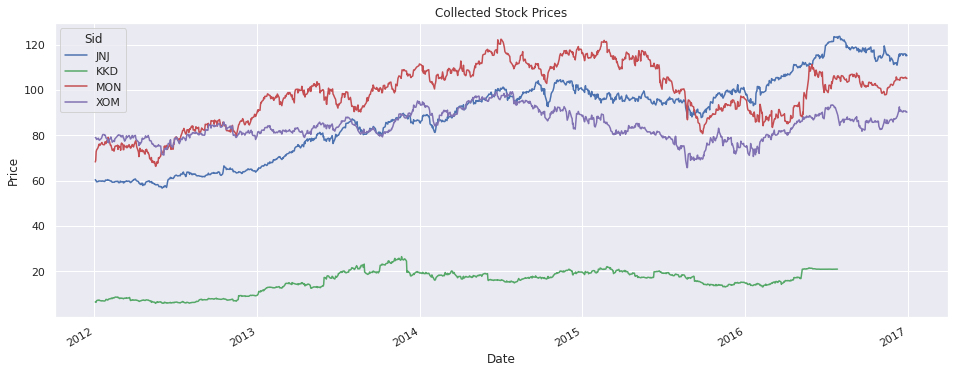

In [73]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [74]:
prices.mean(axis=0)

Sid
JNJ    88.983560
KKD    15.453603
MON    98.356854
XOM    84.021653
dtype: float64

As well as the standard deviation:

In [75]:
prices.std(axis=0)

Sid
JNJ    18.026796
KKD     5.016813
MON    12.971706
XOM     6.301019
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [76]:
prices.describe()

Sid,JNJ,KKD,MON,XOM
count,1258.000000,1149.000000,1258.000000,1258.000000
mean,88.983560,15.453603,98.356854,84.021653
std,18.026796,5.016813,12.971706,6.301019
min,56.709000,5.900000,66.335000,65.792000
25%,75.292500,13.000000,88.592500,79.976750
50%,94.091500,16.820000,100.211500,83.230500
75%,99.940500,19.320000,108.674250,88.244250
max,123.714000,26.510000,122.397000,99.256000


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [77]:
(2 * prices - 50).head(5)

Sid,JNJ,KKD,MON,XOM
Date,,,,
2012-01-03,70.946,-36.96,86.562,108.028
2012-01-04,70.210,-37.28,87.948,108.066
2012-01-05,70.064,-37.16,95.560,107.588
2012-01-06,69.018,-35.76,97.134,106.412
2012-01-09,69.202,-35.38,99.014,107.110


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [78]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

Sid,JNJ,KKD,MON,XOM
Date,,,,
2012-01-04,-0.006085,-0.024540,0.010149,0.000240
2012-01-05,-0.001215,0.009434,0.055180,-0.003024
2012-01-06,-0.008712,0.109034,0.010813,-0.007462
2012-01-09,0.001546,0.026685,0.012777,0.004463
2012-01-10,0.004144,-0.016416,0.008925,0.002571


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

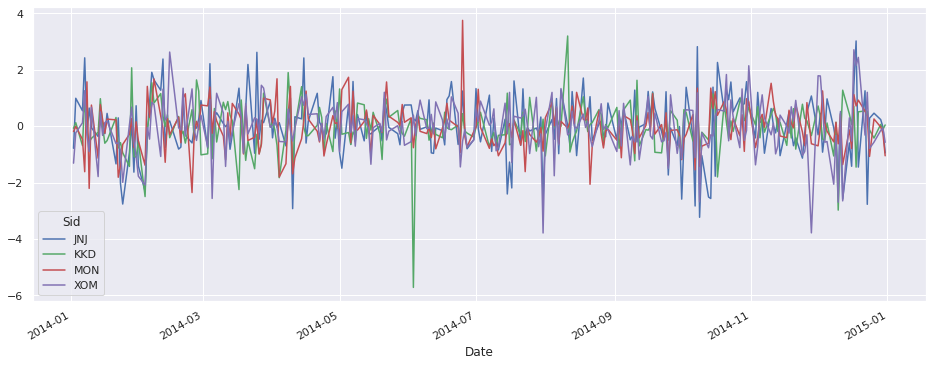

In [79]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [80]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

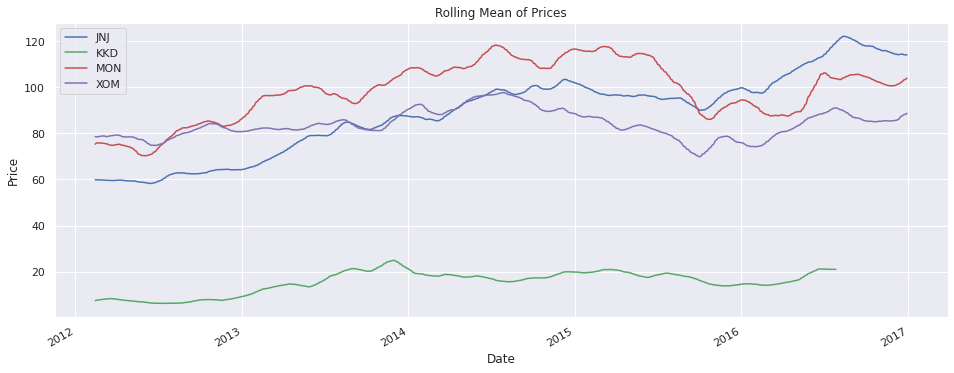

In [81]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

---

**Next Lecture:** [Plotting Data](Lecture05-Plotting-Data.ipynb) 

[Back to Introduction](Introduction.ipynb) 

---

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian") or QuantRocket LLC ("QuantRocket"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, neither Quantopian nor QuantRocket has taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information believed to be reliable at the time of publication. Neither Quantopian nor QuantRocket makes any guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*